In [1]:
import os
import sys
sys.path.append(os.path.expanduser("~/PeganovNeMo"))

from nemo.collections.nlp.modules.common.tokenizer_utils import get_tokenizer

[NeMo W 2020-10-20 09:13:26 experimental:28] Module <class 'nemo.collections.nlp.modules.common.huggingface.auto.AutoModelEncoder'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2020-10-20 09:13:26 experimental:28] Module <class 'nemo.collections.nlp.modules.common.megatron.megatron_bert.MegatronBertEncoder'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [2]:
sys.executable

'/home/apeganov/anaconda3/envs/translation_new_py37/bin/python'

In [3]:
tokenizer = get_tokenizer(tokenizer_name='yttm', tokenizer_model='~/data/wmt14_en_de/bpe_32k_en_de_yttm.model')

In [13]:
from collections import Counter

counters = {
    "train": {'en': Counter(), 'de': Counter()},
    "test": {'en': Counter(), 'de': Counter()},
    "valid": {'en': Counter(), 'de': Counter()}
}

In [9]:
from pathlib import Path

data_path = Path("~/data/wmt14_en_de").expanduser()
with (data_path / Path("test.en")).open('r') as f:
    print(tokenizer.text_to_ids(f.readline()))

[4346, 4101, 12, 24676, 3505, 3501, 11989, 10728, 3549, 3835, 5041, 10853, 5508, 4133]


In [14]:
for data_type in ['train', 'test', 'valid']:
    for lang in ['en', 'de']:
        with (data_path / Path(data_type + '.' + lang)).open('r') as f:
            for l in f:
                counters[data_type][lang][len(tokenizer.text_to_ids(l.strip()))] += 1

In [15]:
count_lines = {
    "train": {'en': [], 'de': []},
    "test": {'en': [], 'de': []},
    "valid": {'en': [], 'de': []}
}
for data_type in ['train', 'test', 'valid']:
    for lang in ['en', 'de']:
        count_lines[data_type][lang] = list(range(max(counters[data_type][lang])+1))
        for k, v in counters[data_type][lang].items():
            count_lines[data_type][lang][k] = v

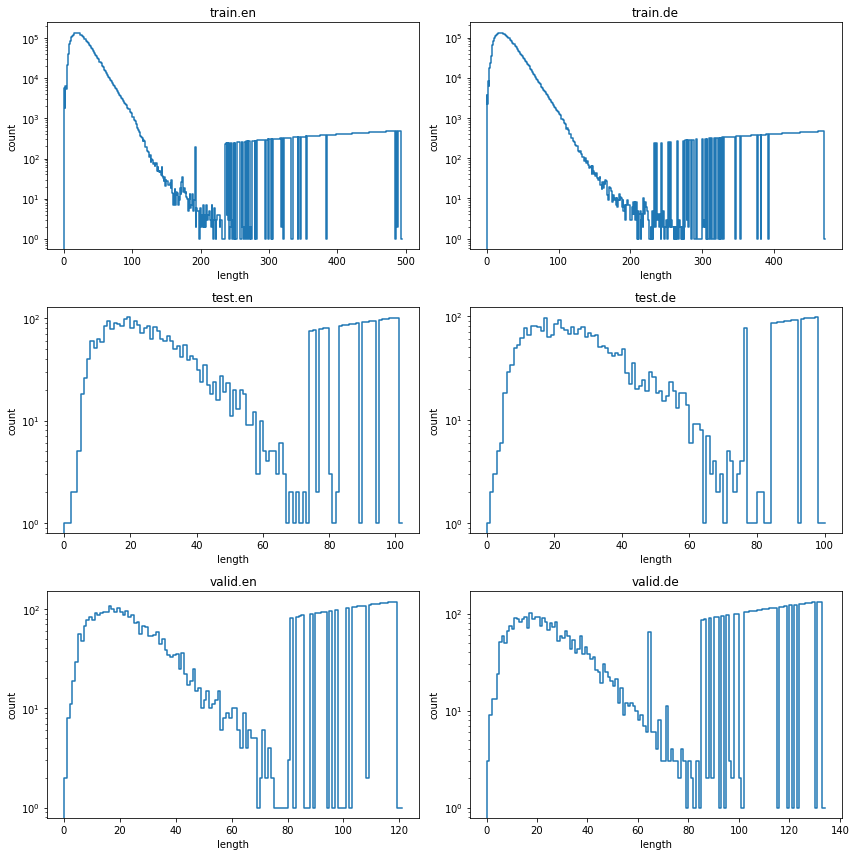

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 12)
for di, data_type in enumerate(['train', 'test', 'valid']):
    for li, lang in enumerate(['en', 'de']):
        axes[di][li].step(range(len(count_lines[data_type][lang])), count_lines[data_type][lang])
        axes[di][li].set_title(data_type + "." + lang)
        axes[di][li].set_yscale('log')
        axes[di][li].set_xlabel('length')
        axes[di][li].set_ylabel('count')
plt.tight_layout()